In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import scipy.special as ss
import seaborn as sns
sns.set()
#%config InlineBackend.figure_format = 'retina'

In [2]:
# Generating 10000 points with arbitrary (x,y) between (-1,1)
x,y = np.random.uniform(-1,1,size=(2,10000))

npcomp = np.vectorize(complex)

# Calculating angle $\phi$ for each point 
ang=np.angle(npcomp(x,y),deg=True)

Text(0.5,1,'$N=10000$')

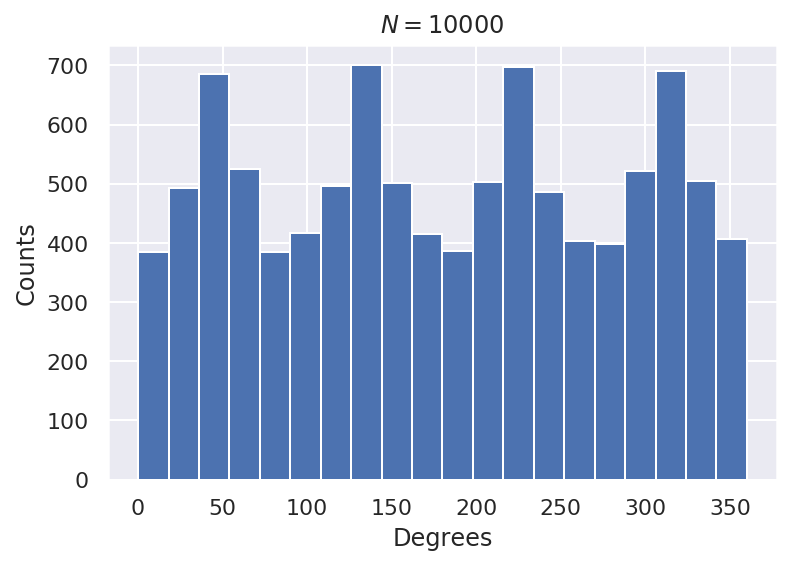

In [3]:
# Plot
plt.hist(ang+180,bins=20)
plt.xlabel("Degrees")
plt.ylabel("Counts")
plt.title("$N=10000$")
#plt.savefig("points_degree.png",dpi=300,bbox_inches = 'tight')

In [4]:
# Acceptance rate
eta= lambda n: np.pi**(n/2)/(ss.gamma(n/2+1)*2**n)

In [5]:
# Calculating acceptance rate for different dimensions
dim=np.arange(1,20)
accrate=eta(dim)

Text(0,0.5,'$\\eta$')

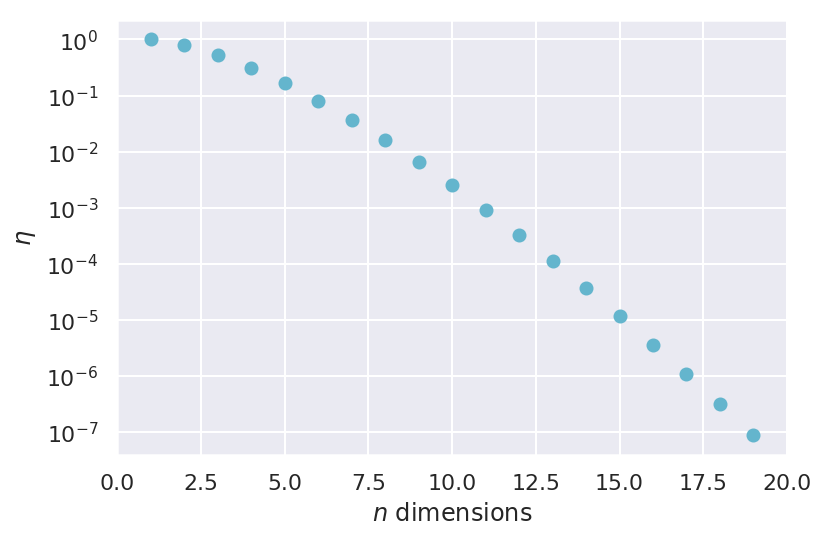

In [6]:
# Plot
plt.semilogy(dim,accrate,"co")
plt.xlim(0,20)
plt.xlabel("$n$ dimensions")
plt.ylabel("$\eta$")
#plt.savefig("eta.png",dpi=300,bbox_inches = 'tight')

In [7]:
# Generating 10000 points with arbitrary (x,y) through Gaussian distribution
x,y = np.random.normal(0,2**(-0.5),size=(2,2000))

/home/yenhsun/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


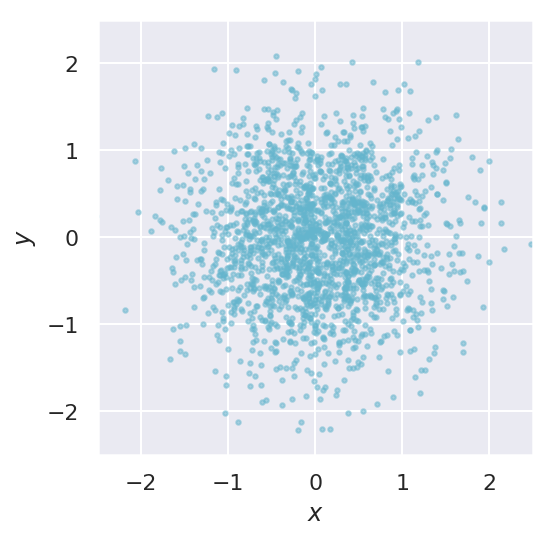

In [8]:
# Plot
plt.scatter(x,y,c="c",alpha=0.5,s=5)
plt.axis('scaled')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axes().set_aspect('equal')
#plt.xlabel("$n$ dimensions")
#plt.ylabel("$\eta$")
plt.savefig("uniform_xy.png",dpi=300,bbox_inches = 'tight')

In [9]:
# Patched algorithm in I&A2

def nsphere_patch(N,dim=2):
    """
    Generating points on the unit sphere in arbitrary dimensions.
    N: How many points we want to generate?
    dim: Dimension of the sphere.
    """
    
    # Step 1
    X = np.random.normal(0,1/np.sqrt(dim),size=(dim,N))
    # Step 2: Normalization constant
    r = np.linalg.norm(X,axis=0)
    
    # The following returns:
    # 1st row: all N points' positions on x-axis
    # 2nd row: all N points' positions on y-axis
    # ...
    # d-th row: all N points' positions on d-axis
    # It can be projected to traditional (x,y,z,...,d) coordinate by transpose T
    return X/r

In [10]:
# Calculating $\phi$ for each point generated from patched algorithm
x,y=nsphere_patch(10000)
ang=np.angle(npcomp(x,y),deg=True)

Text(0.5,1,'Patched algorithm, $N=10000$')

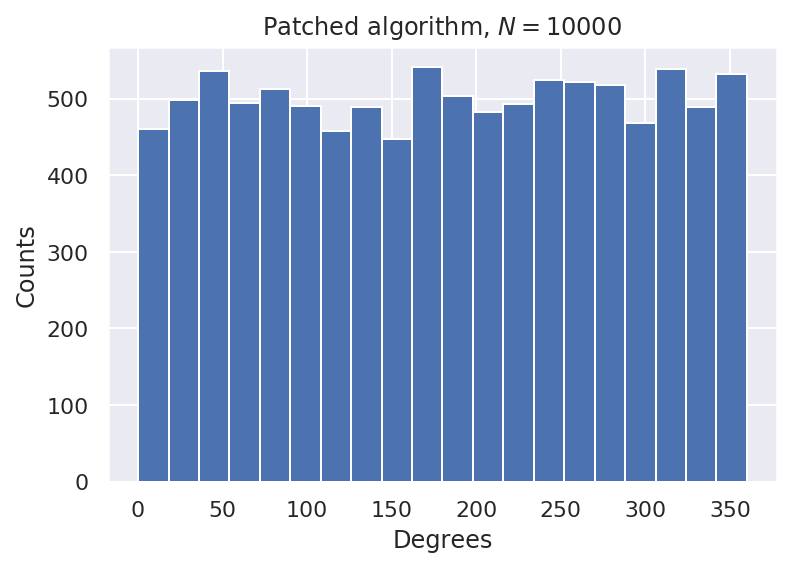

In [11]:
# Plot
plt.hist(ang+180,bins=20)
plt.xlabel("Degrees")
plt.ylabel("Counts")
plt.title("Patched algorithm, $N=10000$")
#plt.savefig("points_degree_patched.png",dpi=300,bbox_inches = 'tight')